<a href="https://colab.research.google.com/github/christabs27/Linear-Regression-for-Heights/blob/main/Activity_11_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.6.2 Activity

Breast Cancer Detection

According to the American Cancer Society, breast cancer is the most common cancer in American women, except for skin cancers. The average risk of a woman in the United States developing breast cancer sometime in her life is about 13%. This means there is a 1 in 8 chance she will develop breast cancer.

Mammograms are used to detect breast cancer, hopefully at an early stage. However, many masses that appear on a mammogram are not actually cancer. Developing a machine learning model to predict whether a tumor is benign or cancerous would be helpful for physicians as they guide and treat patients.

In this module, we'll use the SVM algorithm with different kernels to classify the tumors as benign and malignant.  We'll see if this model does a better or worse job classifying the tumors compared to logistic regression and KNN.  

#Step 1: Download and save the `cancer.csv` dataset from the class materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `cancer.csv` dataset by running the following code block 

* When prompted, navigate to and select the `cancer.csv` dataset where you saved it on your computer.

In [1]:
#Step 2

from google.colab import files
cancer = files.upload()

Saving cancer.csv to cancer.csv


#Step 3: Import necessary packages

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
```

In [2]:
#Step 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



# Step 4: Create a Pandas DataFrame from the CSV file
* Name the DataFrame `cancer`.
* Print the first five observations of `cancer`.  Note the kinds of data it contains.

In [4]:
#Step 4

cancer=pd.read_csv('cancer.csv')
cancer.describe



<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

#Step 5: Convert the variable `Diagnosis` into a numeric data type  
* There are many ways to accomplish this, but you may choose to work with the example shown below.  

```
cancer.loc[cancer['diagnosis'] == 'M', 'cancer_present'] = 1
cancer.loc[cancer['diagnosis'] == 'B', 'cancer_present'] = 0

```
* Name the result `cancer_present` and code malignant tumors with a `1` and benign tumors with a `0`.






In [5]:
#Step 5

cancer.loc[cancer['diagnosis'] == 'M', 'cancer_present'] = 1
cancer.loc[cancer['diagnosis'] == 'B', 'cancer_present'] = 0




#Step 6: Split the data into the target variable and the feature of interest
* We want to predict if a tumor is benign or malignant (`cancer_present`) using the mean tumor perimeter measure (`perimeter_mean`).
* Select the all of the features of the cancer DataFrame **except** `id`, `diagnosis` and `cancer_present`, and and name the resulting DataFrame X.
* Select the column `cancer_present` from the cancer DataFrame and name it y. Make sure y is also a DataFrame and not a Series.

In [6]:
#Step 6
y = cancer['cancer_present']
X = cancer.drop(['id','diagnosis','cancer_present'],axis=1)


#Step 7: Split the data into a training dataset and a test dataset
* Use `train_test_split` from `sklearn.model_selection`.
* Name the X training/validation set `X_train` and the y training/validation set `y_train`.
* Name the X test set `X_test` and the y test set `y_test`.
* Set the `test_size = 0.25` and `random_state = 42`. 






In [7]:
#Step 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#Step 8: Build a pipeline that will impute and standardize the data and fit an SVM with a linear kernel
* The first step shoulde be `SimpleImputer(missing_values=np.nan, strategy='mean'))`.
* The second step should be `StandardScaler()`.
* And the third step should be `SVC(kernel='linear')`.  
* Name the pipeline `linear`.
* Fit the pipeline to `X_train` and `Y_train`.






In [13]:
#Step 8

linear = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan,strategy='mean')),
                   ('scaler', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=3))])
pipe.fit(X_train, y_train)


Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=10))])

#Step 9: Evaluate the pipeline using 10-fold cross-validation  
* Calculate and print the accuracy of each of the five models using `linear_scores = cross_val_score(linear, X_train, y_train, cv=10)`.
* Calculate and print the mean and SD of the accuracy measures returned from cross-validation.





In [14]:
#Step 9
from sklearn.model_selection import cross_val_score
linear_scores = cross_val_score(linear, X_train, y_train, cv=10)

print(linear_scores)
print(scores.mean())
print(scores.std())






TypeError: ignored

#Step 10: Build a pipeline that will impute and standardize the data and fit an SVM with a polynomial kernel, then valuate the model using 10-fold CV
* Note that you can copy and adapt much of the code you used in the last few steps.
* The first step shoulde be `SimpleImputer(missing_values=np.nan, strategy='mean'))`.
* The second step should be `StandardScaler()`.
* And the third step should be `SVM(kernel='poly')`.
* Name the pipeline `poly`.
* Fit the pipeline to `X_train` and `Y_train`.
* Calculate and print the accuracy of each of the five models using poly_scores = cross_val_score(pipe, X_train, y_train, cv=10).
* Calculate and print the mean and SD of the accuracy measures returned from cross-validation.





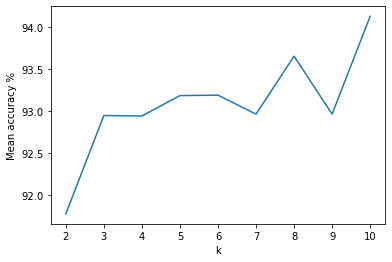

In [11]:
#Step 10
k = list(range(2,11))
mean_accuracy = []

for i in k:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('scaler', StandardScaler()), 
                     ('KNN', KNeighborsClassifier(n_neighbors=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()



#Step 11: Build a pipeline that will impute and standardize the data and fit an SVM with a radial basis function kernel, then evaluate the model using 10-fold CV
* Note that you can copy and adapt much of the code you used in the last few steps.
* The first step shoulde be `SimpleImputer(missing_values=np.nan, strategy='mean'))`.
* The second step should be `StandardScaler()`.
* And the third step should be `SVM(kernel='rbf')`.
* Name the pipeline `rbf`.
* Fit the pipeline to `X_train` and `Y_train`.
* Calculate and print the accuracy of each of the five models using rbf_scores = cross_val_score(pipe, X_train, y_train, cv=10).
* Calculate and print the mean and SD of the accuracy measures returned from cross-validation.





In [ ]:
#Step 11




#Step 12: Which kernel produced the highest accuracy?

**Step 12 Answer:**



#Step 13: Print the mean accuracy for different values of C, the regularization parameter, for an SVM with a RBF kernel  
* Run the following code block to calculate mean accuracy for several values of C.
* The code below will also print a graph of the mean accuracy for each C.
* What value(s) of C produce the highest accuracy?





In [ ]:
#Step 13

mean_accuracy = []

for i in [1,10,100,1000,10000]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('scaler', StandardScaler()), 
                       ('rbf', SVC(kernel='rbf', C=i))])

  pipe.fit(X_train, y_train)
  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


C_df = pd.DataFrame([1,10,100,1000,10000])
C_df.rename({0:'C'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([C_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['C'], to_plot['mean accuracy'])
plt.xlabel('C')
plt.ylabel('Mean accuracy %')
plt.show()


**Step 13 Answer:**





#Step 14: Does the SVM model with a RBF kernel and C=10 work better, worse, or about the same as logistic regression and KNN?
* Recall that the accuracy for logistic regression and KNN were just under 94%.


**Step 14 Answer:**

